<a href="https://colab.research.google.com/github/TokaOssama/Volcanic-Eruption-Prediction/blob/main/CNN_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import os 
from scipy import signal
from sklearn.model_selection import train_test_split
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization, Input, Conv1D, MaxPooling1D
from keras.models import Sequential
from keras.optimizers import Adam
import keras
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')
#drive.mount("/content/drive", force_remount=True)
training_files_path = './drive/My Drive/VolcanicData/train'
target_file = pd.read_csv ('./drive/My Drive/VolcanicData/train.csv')
target_file.head()


Mounted at /content/drive


,segment_id,time_to_eruption
0,1136037770,12262005
1,1969647810,32739612
2,1895879680,14965999
3,2068207140,26469720
4,192955606,31072429


In [3]:
filename = []
for file in target_file['segment_id']:
    filename.append('./drive/My Drive/VolcanicData/train/'+str(file)+'.csv')
target_file['filename'] = filename 
#print(target_file['filename'])
target_file = target_file.drop('segment_id',axis = 1)
target_file.head()

,time_to_eruption,filename
0,12262005,./drive/My Drive/VolcanicData/train/1136037770...
1,32739612,./drive/My Drive/VolcanicData/train/1969647810...
2,14965999,./drive/My Drive/VolcanicData/train/1895879680...
3,26469720,./drive/My Drive/VolcanicData/train/2068207140...
4,31072429,./drive/My Drive/VolcanicData/train/192955606.csv


(201, 202)
(25, 202)


Text(0.5, 1.0, 'STFFT result after frequency redmishioning')

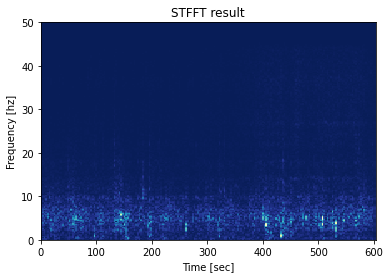

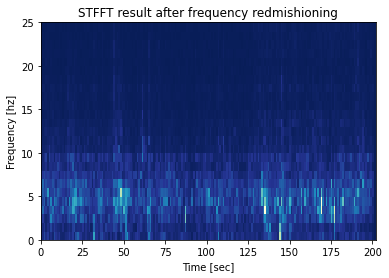

In [ ]:
# select an instance, and load the file
file = '1136037770'
file_path = './drive/My Drive/VolcanicData/train/'+str(file)+'.csv'
df = pd.read_csv(file_path)      # Load the csv file

# Select a Sensor [0-9]
sensor = 1   
sensor_raw = df['sensor_' + str(sensor+1)]
# Define parameters for the STFFT'''
nperseg = 400                  #length of segmet 
overlap_factor = 0.25          # overlapping factor between segements
noverlap = overlap_factor*nperseg

# stFFT transformation 
f, t, Zxx = signal.stft( sensor_raw, 100, nperseg=nperseg, noverlap=noverlap)       

# Cleaning up the nan and looking at absolute values (amplitude)
Zxx = np.nan_to_num(Zxx)
stFFT_amp = np.abs(Zxx)
print(stFFT_amp.shape)
# plotting of the stFFT results 
plt.figure()
plt.pcolormesh(t, f, stFFT_amp,cmap='YlGnBu_r')
plt.ylabel('Frequency [hz]')
plt.xlabel('Time [sec]')
plt.title('STFFT result')

# Redimensionning in the frequency dimension '''  
stFFT_amp = stFFT_amp[1:,:]   # removal of the 1st row of the frequency (Frequency = 0hz)
stFFT_amp = np.mean(stFFT_amp.reshape(int(50),4,int(202)), axis=1)    # averaging on the frequency axis
stFFT_amp = stFFT_amp[:25,:]     # removal of the last rows of the frequency
print(np.shape(stFFT_amp))

# plotting of the stFFT results 
plt.figure()
plt.pcolormesh(stFFT_amp,cmap='YlGnBu_r')
plt.ylabel('Frequency [hz]')
plt.xlabel('Time [sec]')
plt.title('STFFT result after frequency redmishioning')


In [ ]:
# Define parameters for the STFFT'''
Data_s=[]
Data=[]
sensors=10
nperseg = 400                           # length of segment
overlap_factor = 0.25                    # Factor for overlapping the segement
reduction_factor=4     #reductio factor
f_reduc = 50    # size after reduction of frecuency
noverlap = overlap_factor*nperseg
for file_path in filename :
  df = pd.read_csv(file_path)      # Load the csv file
  Data_s=[]
  for i in range(sensors):
    sensor_raw = df['sensor_' + str(i+1)]
    # stFFT transformation 
    frequency, time, Zxx = signal.stft( sensor_raw, 100, nperseg=nperseg, noverlap=noverlap)
    # Cleaning up the nan and looking at absolute values (amplitude)
    Zxx = np.nan_to_num(Zxx)
    stFFT_amplitude = np.abs(Zxx)
    # Redimensionning in the frequency dimension ut no time reduction needed
    stFFT_amplitude = stFFT_amplitude[1:,:]   # removal of the 1st row of the frequency (Frequency = 0hz)
    stFFT_amplitude = np.mean(stFFT_amplitude.reshape(int(f_reduc),reduction_factor,int(202)), axis=1)    # averaging on the frequency axis
    stFFT_amplitude = stFFT_amplitude[:25,:]     # removal of the last rows of the frequency
    #print(np.shape(stFFT_amplitude))
    Data_s.append(stFFT_amplitude)
  Data.append(Data_s)
  #print(len(Data))
print(len(Data))


In [ ]:
Data=np.array(Data)
np.save('./drive/My Drive/Volcano Project/Saveddata',Data)

In [4]:

Data=np.load('./drive/My Drive/Volcano Project/Saveddata.npy')
print(Data.shape)

(4431, 10, 25, 202)


In [5]:
test_df = pd.read_csv('./drive/My Drive/VolcanicData/sample_submission.csv')
test_df.head()

,segment_id,time_to_eruption
0,1000213997,0
1,100023368,0
2,1000488999,0
3,1001028887,0
4,1001857862,0


In [6]:
filename = []
for file in test_df['segment_id']:
    filename.append('./drive/My Drive/VolcanicData/test/'+str(file)+'.csv')
test_df['filename'] = filename
test_df.head()

,segment_id,time_to_eruption,filename
0,1000213997,0,./drive/My Drive/VolcanicData/test/1000213997.csv
1,100023368,0,./drive/My Drive/VolcanicData/test/100023368.csv
2,1000488999,0,./drive/My Drive/VolcanicData/test/1000488999.csv
3,1001028887,0,./drive/My Drive/VolcanicData/test/1001028887.csv
4,1001857862,0,./drive/My Drive/VolcanicData/test/1001857862.csv


In [ ]:
# Define parameters for the STFFT'''
TestData_s=[]
TestData=[]
sensors=10
nperseg = 400                           # segement size
overlap_factor = 0.25                    # Factor for overlapping segements
reduction_factor=4     #reductio factor
f_reduc = 50    # size after reduction of frecuency
noverlap = overlap_factor*nperseg
for file_path in filename:
  df = pd.read_csv(file_path)      # Load the csv file
  TestData_s=[]
  for i in range(sensors):
    sensor_raw = df['sensor_' + str(i+1)]
    # stFFT transformation 
    frequency, time, Zxx = signal.stft( sensor_raw, 100, nperseg=nperseg, noverlap=noverlap)
    # Cleaning up the nan and looking at absolute values (amplitude)
    Zxx = np.nan_to_num(Zxx)
    stFFT_amplitude = np.abs(Zxx)
    # Redimensionning in the frequency dimension ut no time reduction needed
    stFFT_amplitude = stFFT_amplitude[1:,:]   # removal of the 1st row of the frequency (Frequency = 0hz)
    stFFT_amplitude = np.mean(stFFT_amplitude.reshape(int(f_reduc),reduction_factor,int(202)), axis=1)    # averaging on the frequency axis
    stFFT_amplitude = stFFT_amplitude[:25,:]     # removal of the last rows of the frequency
    #print(np.shape(stFFT_amplitude))
    TestData_s.append(stFFT_amplitude)
  TestData.append(TestData_s)
print(len(TestData))


4520


In [ ]:
TestData=np.array(TestData)
np.save('./drive/My Drive/Volcano Project/working',TestData)

In [7]:
TestData=np.load('./drive/My Drive/Volcano Project/working.npy')

In [8]:
TestData=np.array(TestData)
print(TestData.shape)
TestData = TestData.reshape(4520, 10, 25, 202)
TestData=np.transpose(TestData,axes=[0,3,2,1])
print(TestData.shape)
TestData = np.concatenate((TestData[:,:,:,0], TestData[:,:,:,1], TestData[:,:,:,2], TestData[:,:,:,3], TestData[:,:,:,4], TestData[:,:,:,5], TestData[:,:,:,6], TestData[:,:,:,7], TestData[:,:,:,8], TestData[:,:,:,9]), axis=2 ) 
print(TestData.shape)
TestData_max=np.max(TestData)
TestData_min=np.min(TestData)
TestData = (TestData-TestData_min) / (TestData_max-TestData_min)

(4520, 10, 25, 202)
(4520, 202, 25, 10)
(4520, 202, 250)


In [9]:

y = target_file['time_to_eruption']
#s = test_df['filename']
train_x, valid_x, train_y, valid_y = train_test_split(Data, y, test_size=0.25, random_state=8)
train_x=np.array(train_x)
valid_x=np.array(valid_x)
X = train_x.reshape(3323, 10, 25, 202)
X = np.transpose(X, axes=[0, 3, 2, 1])
valid_x, x_test, valid_y, y_test = train_test_split(valid_x,valid_y, test_size=0.25, random_state=8)
valid_x=np.array(valid_x)
x_valid=valid_x.reshape(831, 10, 25, 202)
x_valid = np.transpose(x_valid, axes=[0, 3, 2, 1])  

x_test=x_test.reshape(277, 10, 25, 202)
x_test = np.transpose(x_test, axes=[0, 3, 2, 1])  
## reshape the database into a matric of m, n_t, n_f*n_s dimensions
# =Stacking the different sensors on top of each other
X = np.concatenate((X[:,:,:,0], X[:,:,:,1], X[:,:,:,2], X[:,:,:,3], X[:,:,:,4], X[:,:,:,5], X[:,:,:,6], X[:,:,:,7], X[:,:,:,8], X[:,:,:,9]), axis=2 ) 
x_valid = np.concatenate((x_valid[:,:,:,0], x_valid[:,:,:,1], x_valid[:,:,:,2], x_valid[:,:,:,3], x_valid[:,:,:,4], x_valid[:,:,:,5], x_valid[:,:,:,6], x_valid[:,:,:,7], x_valid[:,:,:,8], x_valid[:,:,:,9]), axis=2 ) 
x_test = np.concatenate((x_test[:,:,:,0], x_test[:,:,:,1], x_test[:,:,:,2],x_test[:,:,:,3],x_test[:,:,:,4], x_test[:,:,:,5], x_test[:,:,:,6], x_test[:,:,:,7], x_test[:,:,:,8], x_test[:,:,:,9]), axis=2 ) 

print(X.shape)
print(x_valid.shape)
print(x_test.shape)


print(train_y.shape)

print(valid_y.shape)

#print(train_x)

(3323, 202, 250)
(831, 202, 250)
(277, 202, 250)
(3323,)
(831,)


In [10]:
# regularisation
X_max = np.max(X)
x_valid_max=np.max(x_valid)
X_min = np.min(X)   # in case the min is not 0  
x_valid_min=np.min(x_valid)
print('  X max : ', X_max, 'X min : ', X_min)
X = (X-X_min) / (X_max-X_min)
x_valid = (x_valid-x_valid_min) / (x_valid_max-x_valid_min)
X_max = np.max(X)
X_min = np.min(X)   # in case the min is not 0  
print('  X max : ', X_max, 'X min : ', X_min)
x_test_max=np.max(x_test)
x_test_min = np.min(x_test) 
x_test = (x_test-x_test_min) / (x_test_max-x_test_min)

  X max :  11503.978430089555 X min :  0.0
  X max :  1.0 X min :  0.0


In [11]:
n_timesteps, n_features, n_outputs = 202, 25, 1

In [12]:
from keras.optimizers import Adam
optimizer = Adam(learning_rate=0.03,
                 beta_1=0.9,
                 beta_2=0.999,
                 epsilon=1e-07)
metrics="mean_absolute_error"

In [13]:
"""
CNN model
"""
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=15, strides=1, padding='same', activation='relu', input_shape=(n_timesteps,10*n_features)))
model.add(MaxPooling1D(pool_size=2, strides=1))

# model.add(Dropout(0.5))\n",
model.add(Conv1D(filters=32, kernel_size=10, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2, strides=1))

model.add(Dropout(0.2))
model.add(Conv1D(filters=12, kernel_size=7, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2, strides=1))
model.add(Dropout(0.3))


# model.add(BatchNormalization())
model.add(Flatten(name = "flatten"))
model.add(Dropout(0.2))
# model.add(Dense(units=120, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='relu'))


In [14]:
from keras.callbacks import (ModelCheckpoint, LearningRateScheduler,
                             EarlyStopping, ReduceLROnPlateau,CSVLogger)
early = EarlyStopping(monitor="val_loss", 
                      mode="min", 
                      patience=25)

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 202, 64)           240064    
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 201, 64)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 201, 32)           20512     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 200, 32)           0         
_________________________________________________________________
dropout (Dropout)            (None, 200, 32)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 200, 12)           2700      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 199, 12)           0

In [16]:
num_train_samples = X.shape[0]
num_valid_samples = x_valid.shape[0]
print(train_x.shape[0])

3323


In [17]:

model.compile(loss='mae', optimizer=optimizer, metrics=metrics)

results=model.fit(
        X,train_y,
        steps_per_epoch=num_train_samples // 64,
        epochs=200,
        validation_data=(x_valid,valid_y),
        validation_steps=num_valid_samples // 64,
        callbacks=[early]
        )




Epoch 1/200
51/51 [==============================] - 27s 521ms/step - loss: 18883790.1731 - mean_absolute_error: 18883790.1731 - val_loss: 10694846.0000 - val_mean_absolute_error: 10694846.0000
Epoch 2/200
51/51 [==============================] - 27s 528ms/step - loss: 10071131.4423 - mean_absolute_error: 10071131.4423 - val_loss: 9410061.0000 - val_mean_absolute_error: 9410061.0000
Epoch 3/200
51/51 [==============================] - 27s 533ms/step - loss: 8939809.3654 - mean_absolute_error: 8939809.3654 - val_loss: 8444099.0000 - val_mean_absolute_error: 8444099.0000
Epoch 4/200
51/51 [==============================] - 27s 531ms/step - loss: 8147008.7115 - mean_absolute_error: 8147008.7115 - val_loss: 7847427.5000 - val_mean_absolute_error: 7847427.5000
Epoch 5/200
51/51 [==============================] - 27s 534ms/step - loss: 7783614.4327 - mean_absolute_error: 7783614.4327 - val_loss: 7801406.0000 - val_mean_absolute_error: 7801406.0000
Epoch 6/200
51/51 [=========================

In [24]:
print('Final Validation Mean absolute error : ', results.history['val_mean_absolute_error'][-1])
print('Final Training Mean absolute error : ', results.history['mean_absolute_error'][-1])

Final Validation Mean absolute error :  2904451.25
Final Training Mean absolute error :  2044192.0


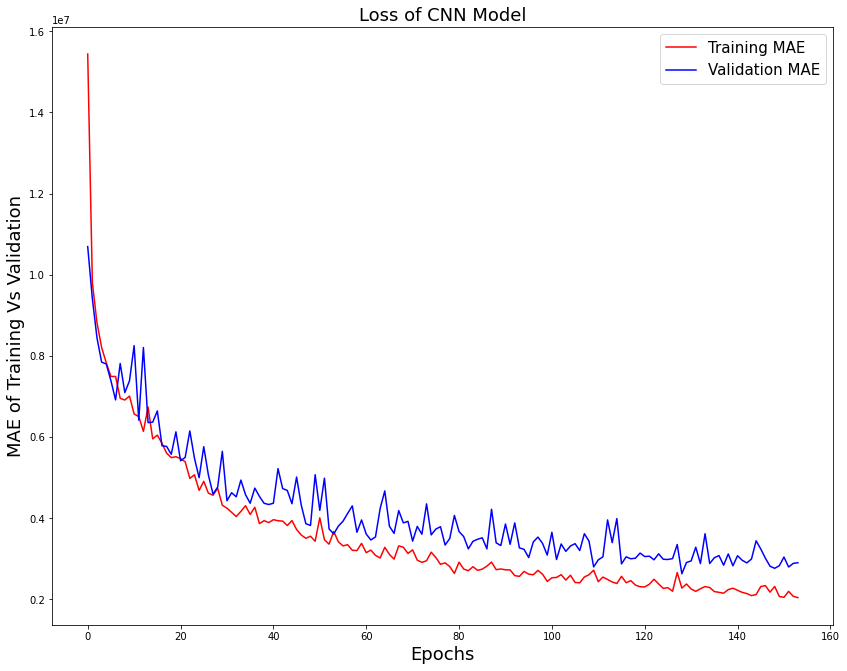

In [25]:
plt.figure(figsize=(14,11))
plt.plot(results.history['mean_absolute_error'], color='r',label='Training MAE')
plt.plot(results.history['val_mean_absolute_error'], color='b',label='Validation MAE')


plt.xlabel('Epochs',fontsize=18)
plt.ylabel('MAE of Training Vs Validation',fontsize=18)
plt.title('Loss of CNN Model',fontsize=18)
plt.legend(fontsize=15,loc='upper right')
plt.show()

In [18]:
evaluation=model.evaluate(x_test,y_test)

9/9 [==============================] - 1s 69ms/step - loss: 2907124.0000 - mean_absolute_error: 2907124.0000


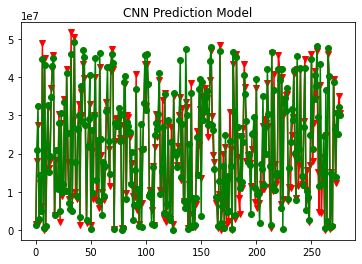

In [36]:
eval=model.predict(x_test) 
valid=np.reshape(y_test,(-1,)).tolist() 
figure=plt.figure()
plt.plot(eval, color='r',marker='v', linestyle='-',label='Predicted')
plt.plot(valid, color='g', marker='o', linestyle='-',label='Actual')
plt.title('CNN Prediction Model')
plt.show()

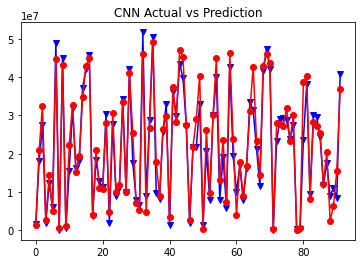

In [23]:
neval=model.predict(x_test[:len(x_test)//3]) 
nvalid=np.reshape(y_test[:len(y_test)//3],(-1,)).tolist() 
figure=plt.figure()
plt.plot(neval, color='b', marker='v', linestyle='-',label='Predicted')
plt.plot(nvalid, color='r', marker='o', linestyle='-',label='Actual')
plt.title('CNN Actual vs Prediction')
plt.show()

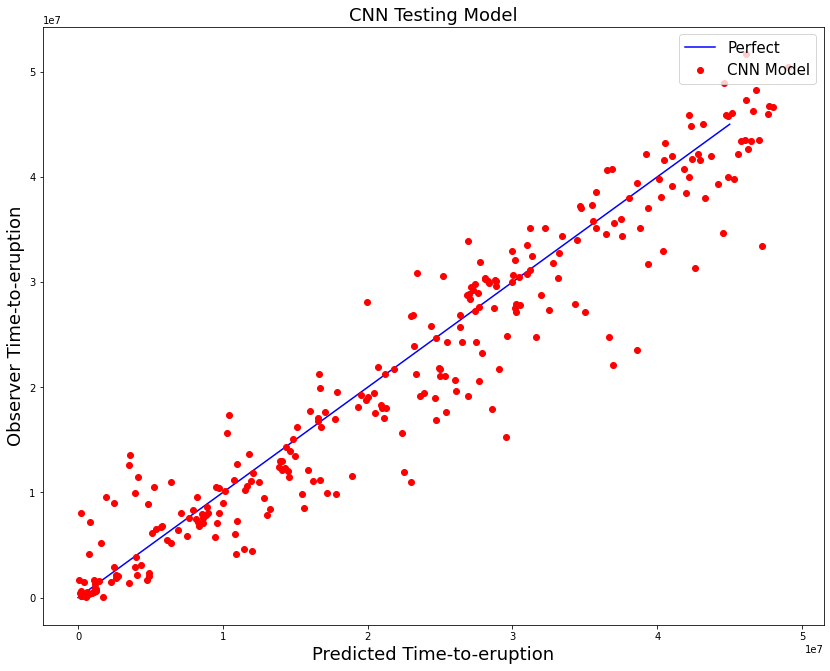

In [22]:
y=model.predict(x_test) 
nvalid=np.reshape(y_test,(-1,)).tolist() 
x = np.linspace(0,45*10**6)
plt.figure(figsize=(14,11))
plt.plot(x,x,'b',linestyle='-',label='Perfect')
plt.plot(nvalid,y,'r',linestyle='',marker='o',label='CNN Model')
plt.ylabel('Observer Time-to-eruption',fontsize=18)
plt.xlabel('Predicted Time-to-eruption',fontsize=18)
plt.title('CNN Testing Model',fontsize=18)
plt.legend(fontsize=15,loc='upper right')
plt.show()

In [19]:
prediction=model.predict(TestData) 
print(prediction.shape)

(4520, 1)


In [20]:
print(prediction)

[[31833962.]
 [41585172.]
 [21951714.]
 ...
 [20632548.]
 [38040524.]
 [22433570.]]


In [21]:
df=pd.DataFrame(prediction)
df.to_csv(index=False)

'0\n31833962.0\n41585172.0\n21951714.0\n18636884.0\n11799576.0\n34843960.0\n32053390.0\n18632978.0\n1020929.2\n16919378.0\n26221890.0\n20599586.0\n25277010.0\n28787910.0\n2884089.0\n8452575.0\n24719296.0\n16834756.0\n30505300.0\n7124770.5\n33918196.0\n7356373.0\n22857080.0\n21547428.0\n9320312.0\n25417072.0\n19638218.0\n9136590.0\n22914586.0\n44286944.0\n14581996.0\n21289842.0\n9552165.0\n2407914.8\n18638976.0\n34478356.0\n12281886.0\n16070944.0\n31802788.0\n27592442.0\n20812520.0\n8989028.0\n16989066.0\n19848142.0\n24902056.0\n44115628.0\n30671332.0\n24986496.0\n4469352.5\n42728044.0\n2710831.2\n42555500.0\n40875470.0\n6990453.5\n44897028.0\n31730550.0\n15280618.0\n461301.53\n9973722.0\n41411876.0\n37645450.0\n19578360.0\n27411090.0\n37617324.0\n6522881.5\n10746118.0\n35099796.0\n4117922.5\n11331638.0\n11467402.0\n15751275.0\n21146048.0\n35058640.0\n37003696.0\n23486050.0\n49306844.0\n21105808.0\n39766876.0\n23277600.0\n13907507.0\n23743772.0\n28024338.0\n18082448.0\n35040564.0\n38619

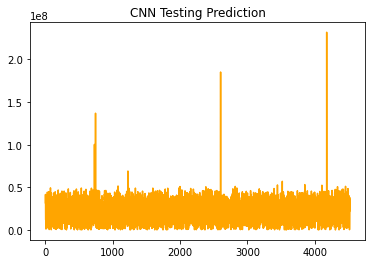

In [26]:
figure=plt.figure()
plt.plot(prediction, color='orange')
#plt.plot(results.history['val_mean_absolute_error'], color='b')
plt.title('CNN Testing Prediction')
plt.show()